In [80]:
#import necessary libraries
import feedparser
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [81]:
# Rss feed urls
europe_url='http://feeds.bbci.co.uk/news/world/europe/rss.xml'
asia_url='http://feeds.bbci.co.uk/news/world/asia/rss.xml'
africa_url='http://feeds.bbci.co.uk/news/world/africa/rss.xml'
world_url = 'http://feeds.bbci.co.uk/news/world/rss.xml'
top_stories_url = 'http://feeds.bbci.co.uk/news/rss.xml'
us_canada_url = 'http://feeds.bbci.co.uk/news/world/us_and_canada/rss.xml'

In [82]:
#parse the data contained in each feed url
world = feedparser.parse(world_url)
top_stories = feedparser.parse(top_stories_url)
europe = feedparser.parse(europe_url)
asia = feedparser.parse(asia_url)
africa = feedparser.parse(africa_url)
us_canada = feedparser.parse(us_canada_url)


In [83]:
#function to preprocess and clean the data
#return news from each url as a single string
def preprocess_news(data):
    paragraph_word=[]
    for i in range(len(data['items'])):
        tokens = [word for word in word_tokenize(data['items'][i]['summary'].lower()) if word.isalnum()]
        no_stops = [ token for token in tokens if token not in stopwords.words('english')]
        
        for word in no_stops:
            paragraph_word.append(word)
    paragraph = " ".join(paragraph_word)
    
    return paragraph


In [84]:
#function to form a wordcloud 
def draw_word_cloud(paragraph,bg_color):
    wordcloud = WordCloud(width = 1200, height = 500, 
                    background_color =bg_color, 
                    min_font_size = 10).generate(paragraph) 

    # plot the WordCloud image                        
    plt.figure(figsize = (20,20)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

### World News

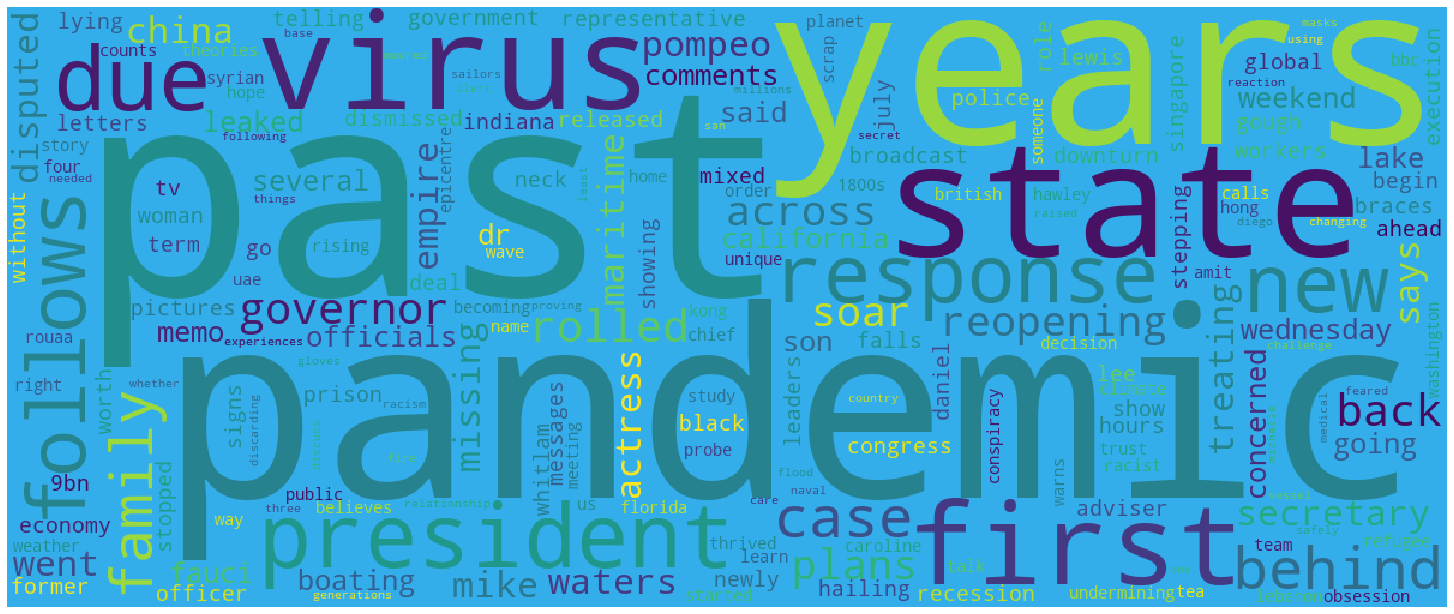

In [85]:
draw_word_cloud(preprocess_news(world),'#34aeeb')

### Top Stories across the world

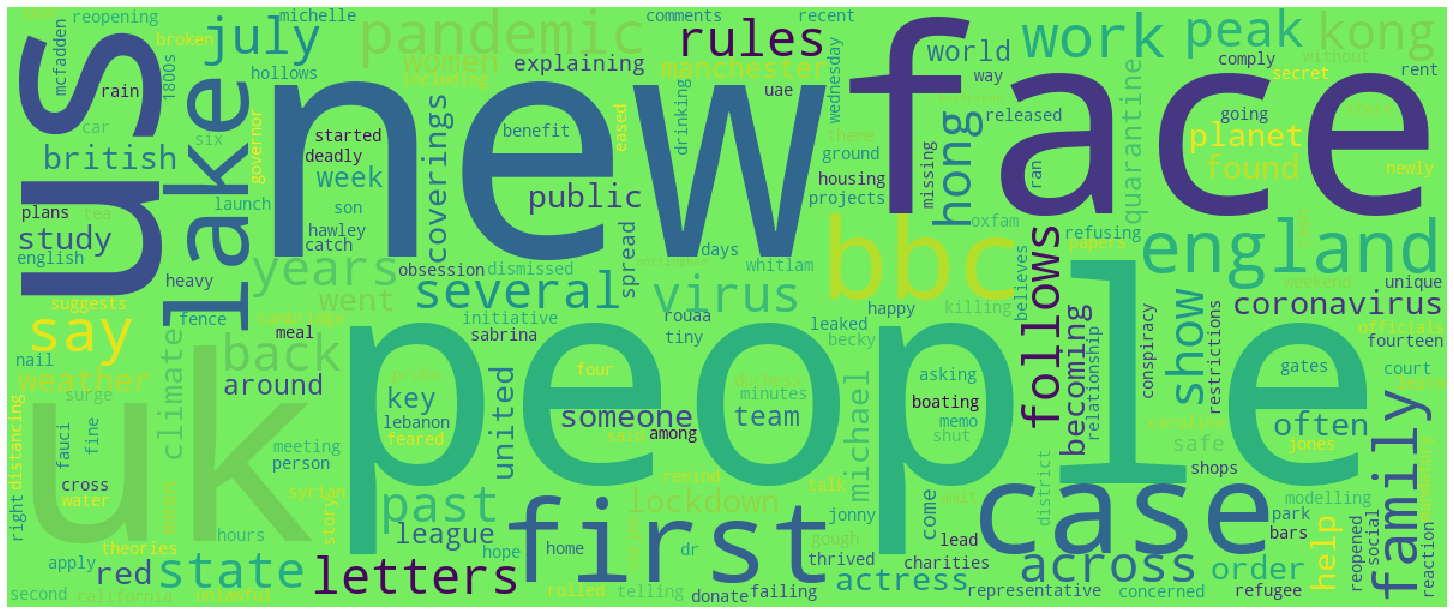

In [86]:
draw_word_cloud(preprocess_news(top_stories),'#76ed61')

### News from Asia

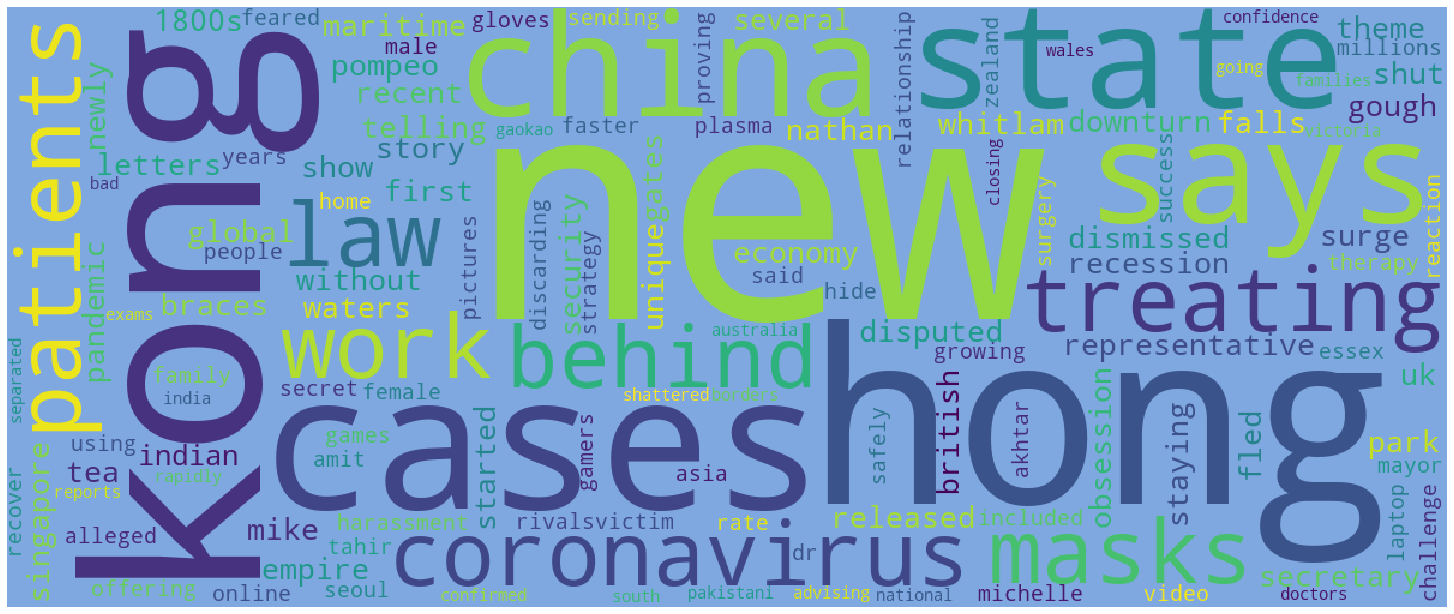

In [87]:
draw_word_cloud(preprocess_news(asia),'#80a8e0')

### Europe

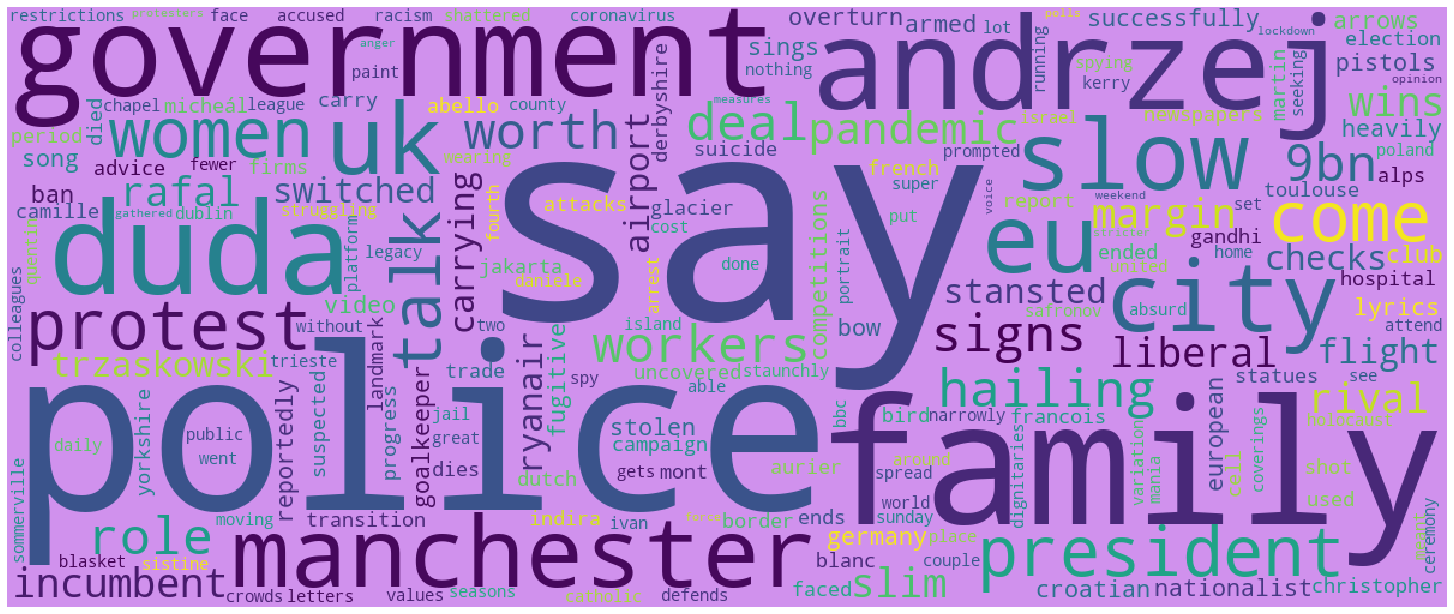

In [88]:
draw_word_cloud(preprocess_news(europe),'#d091ed')

### US & Canada

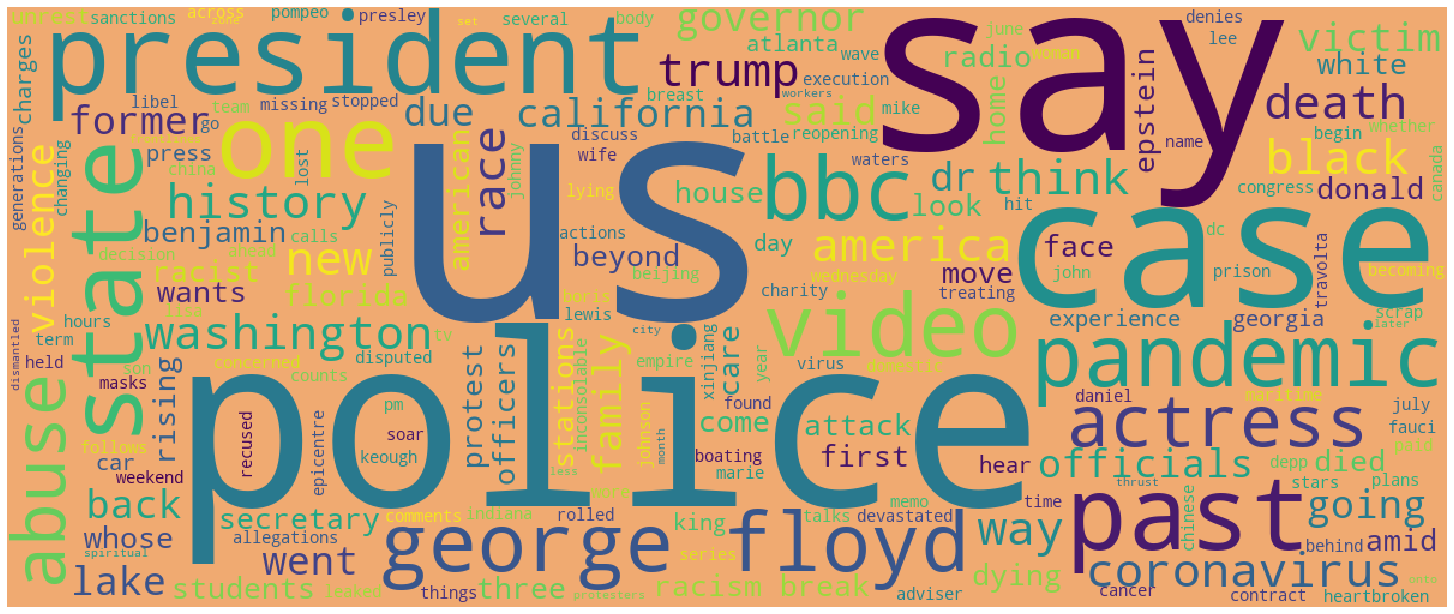

In [89]:
draw_word_cloud(preprocess_news(us_canada),'#f0aa71')

### Africa

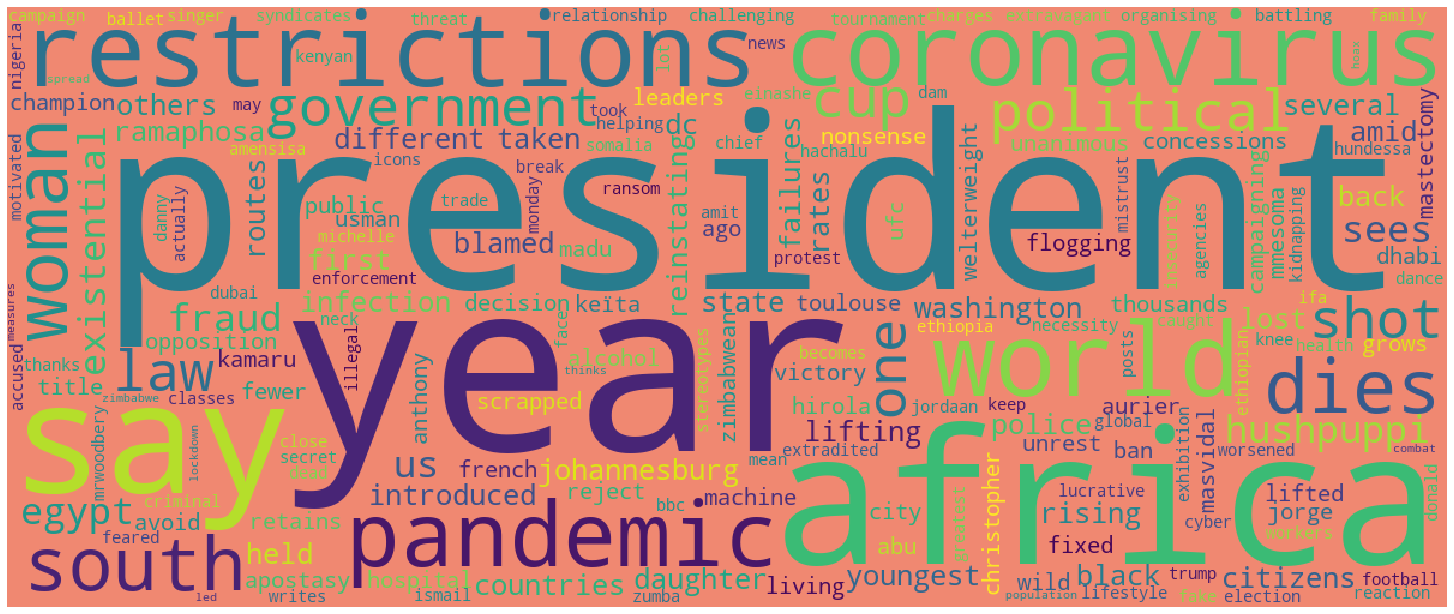

In [90]:
draw_word_cloud(preprocess_news(africa),'#f08871')